<a href="https://colab.research.google.com/github/jos-g/estimativa-de-pi/blob/main/relatorio_1mecfispa_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas



In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics as stat
from scipy import stats as st 
from scipy.stats import norm

#----------


In [4]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['med_pan.xlsx']))
df

Saving med_pan.xlsx to med_pan.xlsx


,Comprimento (cm),Diâmetro (cm)
0,66.52,21.50
1,66.65,21.49
2,66.80,21.53
3,66.72,21.53
4,66.73,21.50
5,66.68,21.50
6,66.63,21.50
7,66.75,21.49
8,66.73,21.39
9,66.72,21.50


#----------

In [5]:
array_1 = df.iloc[: , 0]
array_1 

0    66.52
1    66.65
2    66.80
3    66.72
4    66.73
5    66.68
6    66.63
7    66.75
8    66.73
9    66.72
Name: Comprimento (cm), dtype: float64

In [6]:
array_2 = df.iloc[:, 1]
array_2

0    21.50
1    21.49
2    21.53
3    21.53
4    21.50
5    21.50
6    21.50
7    21.49
8    21.39
9    21.50
Name:  Diâmetro (cm), dtype: float64

In [7]:
N = array_1.size
N

10

#-----------------

In [8]:
media_c = np.sum(array_1) / N 
print("Média do Comprimento (cm): {}".format(media_c))

Média do Comprimento (cm): 66.69300000000001


In [9]:
media_d = np.sum(array_2) / N
print("Média do Diâmetro (cm): {}".format(media_d))

Média do Diâmetro (cm): 21.493000000000002


#-----------------------

In [10]:
desvio_1 = np.std(array_1, ddof=1)
print("Desvio Padrão comprimento (cm): {}".format(desvio_1))

Desvio Padrão comprimento (cm): 0.0780384520605075


In [11]:
desvio_2 = np.std(array_2, ddof=1)
print("Desvio Padrão diâmetro (cm): {}".format(desvio_2))

Desvio Padrão diâmetro (cm): 0.03888730155490645


#------------------------

In [12]:
e_med = 0.5

In [13]:
sigma_1 = desvio_1 / np.sqrt(N)
sigma_1

0.024677925358506388

In [14]:
sigma_2 = desvio_2 / np.sqrt(N)
sigma_2

0.012297244497131175

In [15]:
sigma_c1 = np.sqrt((sigma_1)**2 + (e_med)**2)
sigma_c1

0.5006086295700465

In [16]:
sigma_d1 = np.sqrt((sigma_2)**2 + (e_med)**2)
sigma_d1

0.5001511993609755

In [17]:
sigma_t = np.sqrt((sigma_c1)**2 + (sigma_d1)**2)
sigma_t

0.7076441352984014

In [18]:
print ("Comprimento (cm) = {:.2f} ± {:.2f} cm".format( np.round(media_c, 2), np.round(sigma_t, 2)))

Comprimento (cm) = 66.69 ± 0.71 cm


In [19]:
print ("Diâmetro (cm) = {:.2f} ± {:.2f} cm".format( np.round(media_d, 2), np.round(sigma_t, 2)))

Diâmetro (cm) = 21.49 ± 0.71 cm


#------------------

In [20]:
pi = media_c / media_d 
print("pi: {}".format(pi))

pi: 3.1030102824175314


In [21]:
#incerteza
a= np.sqrt((sigma_c1/media_c)**2 + (sigma_d1/media_d)**2)
inp = np.multiply(pi, a)
print(inp)

0.07587193833768703


In [22]:
pi + inp

3.1788822207552183

In [23]:
#discrepância
dis_p = np.sqrt((pi - math.pi)**2)
print(dis_p)

0.03858237117226171


In [24]:
#erro relativo
er_1 = inp / pi
print(er_1)

0.024451075385601297


In [25]:
er_1*100 #porcentagem do erro

2.4451075385601295

In [26]:
print ("Valor de pi = {:.2f} ± {:.2f} cm".format( np.round(pi, 2), np.round(inp, 2)))

Valor de pi = 3.10 ± 0.08 cm


In [27]:
# o valor encontrado é menor que 2 sigma (2*sigma), logo, é conclusivo;
2*inp

0.15174387667537406

# Gráficos

Text(0.0, 0.05, '$ \\pi \\pm 3\\sigma_{\\overline{\\rm{L}}} = (2.88,3.33)$ (cm)')

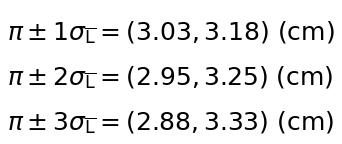

In [41]:
fig = plt.figure( figsize=(8,6) )

media_menos_1sigma = pi - inp
media_mais_1sigma = pi  + inp
media_menos_2sigma = pi- 2 * inp
media_mais_2sigma = pi + 2 * inp
media_menos_3sigma = pi- 3 * inp
media_mais_3sigma = pi + 3 * inp
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

str_ = r"$ \pi  \pm 1\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_1sigma, 2 ), np.round( media_mais_1sigma, 2 ) )
ax.text(0., 0.75, str_, size=25)
str_ = r"$ \pi\pm 2\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_2sigma, 2 ), np.round( media_mais_2sigma, 2 ) )
ax.text(0., 0.40, str_, size=25)
str_ = r"$ \pi \pm 3\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_3sigma, 2 ), np.round( media_mais_3sigma, 2 ) )
ax.text(0., 0.05, str_, size=25)

Text(0, 0.5, 'Distribuição')

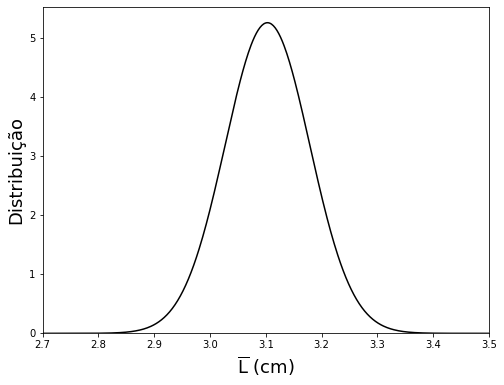

In [42]:
x_min = 2.70
x_max = 3.50

sigma_ = inp
rv = norm( loc=pi, scale=sigma_ )

fig = plt.figure( figsize=(8,6) )

X = np.linspace( x_min, x_max, 500 )

plt.plot( X, rv.pdf( X ), 'k-' )
plt.xlim( x_min, x_max )
plt.ylim( bottom=0. )
plt.xlabel( r"$\overline{\rm{L}}$ (cm)", fontsize=18 )
plt.ylabel( "Distribuição", fontsize=18 )

Text(0, 0.5, 'Distribuição (log)')

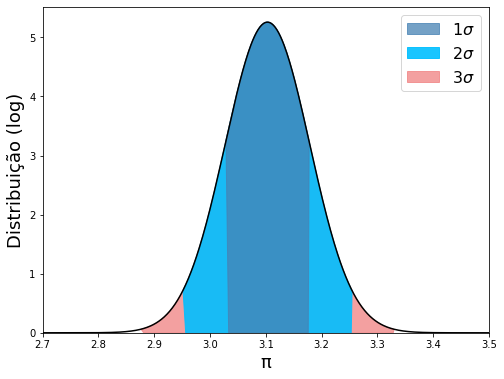

In [43]:
fig = plt.figure( figsize=(8,6) )

X_1sigma = X[ (X >= media_menos_1sigma) & (X <= media_mais_1sigma) ]
X_2sigma = X[ (X >= media_menos_2sigma) & (X <= media_mais_2sigma) ]
X_3sigma = X[ (X >= media_menos_3sigma) & (X <= media_mais_3sigma) ]

plt.plot( X, rv.pdf( X ), 'k-' )
plt.fill( np.concatenate( ( [ X_3sigma[3] ], X_3sigma, [ X_3sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_3sigma ), [ 0. ] ) ), color="lightcoral", alpha=0.75, label=r"$3\sigma$" )
plt.fill( np.concatenate( ( [ X_2sigma[3] ], X_2sigma, [ X_2sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_2sigma ), [ 0. ] ) ), color="deepskyblue", alpha=0.90, label=r"$2\sigma$" )
plt.fill( np.concatenate( ( [ X_1sigma[3] ], X_1sigma, [ X_1sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_1sigma ), [ 0. ] ) ), color="steelblue", alpha=0.75, label=r"$1\sigma$" )
handles, labels = plt.gca().get_legend_handles_labels()
order_ = [ 2, 1, 0 ]
handles_new = [ handles[idx_] for idx_ in order_ ]
labels_new = [ labels[idx_] for idx_ in order_ ]
#plt.legend( loc='best', fontsize=16 )
plt.legend( handles_new, labels_new, loc='best', fontsize=16 )

plt.xlim( x_min, x_max )
plt.ylim( bottom=0. )
#plt.yscale( 'log' )
plt.xlabel( r"π", fontsize=18 )
plt.ylabel( "Distribuição (log)", fontsize=18 )